<a href="https://colab.research.google.com/github/julianamu323/AF/blob/main/An%C3%A1lisis_de_se%C3%B1ales_card%C3%ADacas_por_medio_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos del proyecto.**

### **Carga de datos.**

In [ ]:
import numpy as np   # Sirve para realizar cálculos científicos de manera eficiente.
import pandas as pd  # Sirve para limpiar los datos que necesitamos estudiar.
from google.colab import files

uploaded = files.upload()

Saving ECG 3.csv to ECG 3.csv


In [ ]:
datosp = pd.read_csv('ECG 3.csv',sep=';',low_memory=False)
datosp

,Elapsed time,ECG
0,0.000,-0.165
1,0.008,-0.155
2,0.016,-0.195
3,0.023,-0.205
4,0.031,-0.185
...,...,...
1275,9.961,-0.115
1276,9.969,-0.135
1277,9.977,-0.155
1278,9.984,-0.155


In [ ]:
df=pd.DataFrame(datosp)
print(df)

      Elapsed time    ECG
0            0.000 -0.165
1            0.008 -0.155
2            0.016 -0.195
3            0.023 -0.205
4            0.031 -0.185
...            ...    ...
1275         9.961 -0.115
1276         9.969 -0.135
1277         9.977 -0.155
1278         9.984 -0.155
1279         9.992 -0.165

[1280 rows x 2 columns]


In [ ]:
c1=df.iloc [:, 0]
c2=df.iloc [:, 1]

In [ ]:
a=np.array(c1)
b=np.array(c2)

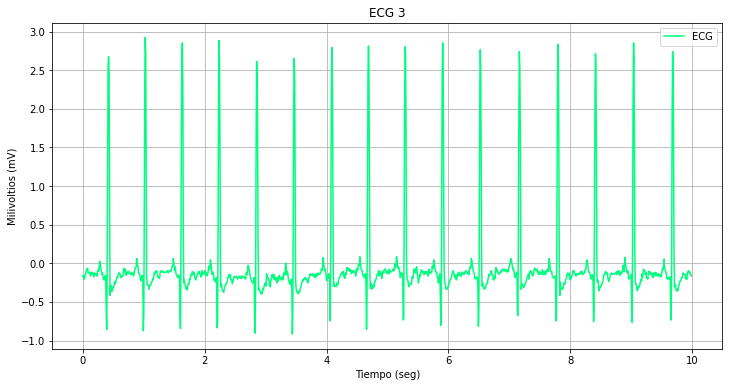

In [ ]:
import matplotlib.pyplot as plt

t=a
mv=b

plt.figure(figsize=(12,6))
plt.plot(t,mv, label='ECG', color='SpringGreen')
plt.title('ECG 3', fontsize=12)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.legend()
plt.grid()
plt.show()

### **Transformadas de Fourier de los ECG.**

In [ ]:
import scipy, matplotlib 
from scipy.fft import fft, ifft

[]

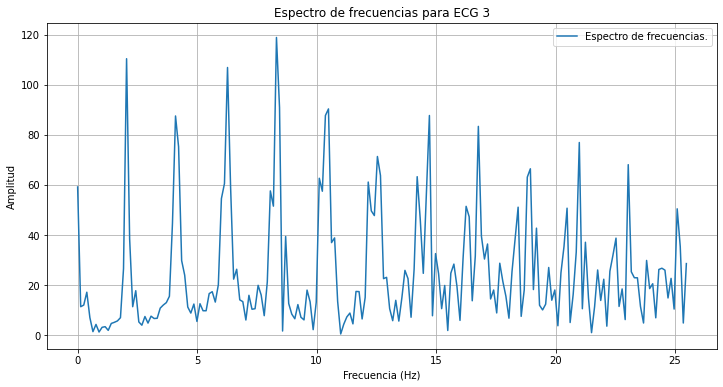

In [ ]:
# Número de puntos de la señal adquirida en el dominio del tiempo.
N=10000

# Frecuencia a la que se muestreó la señal adquirida en el dominio del tiempo.
fs=1280

# Delta de f
deltaf=fs/N

# Líneas de frecuencia.
lf=np.arange(0,N*deltaf,deltaf)

# Transformada de Fourier.
tf=fft(mv)

plt.figure(figsize=(12,6))
plt.plot(lf[:200],np.abs(tf)[:200], label='Espectro de frecuencias.')
plt.title('Espectro de frecuencias para ECG 3')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.plot()

### **Selección de frecuencias.**

In [ ]:
# ¿En qué posiciones se encuentran las frecuencias cuya amplitud supera cierto valor?

busqueda=np.where(np.abs(tf)>100)
busqueda

(array([  16,   49,   65, 1215, 1231, 1264]),)

In [ ]:
# ¿Cuánto vale cada posición dada en lf?

print(lf[0])
print(lf[15])
print(lf[30])

0.0
1.92
3.84


In [ ]:
# ¿Cuál es la frecuencia que podemos encontrar en cada uno de los puntos dados?

print(np.abs(tf[0]))
print(np.abs(tf[11]))
print(np.abs(lf[49]))

59.18
4.708254118708778
6.272


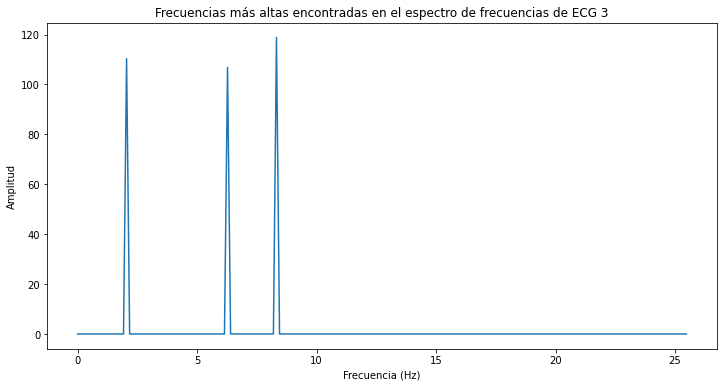

In [ ]:
for n in range(len(tf)):
  if np.abs(tf[n]) < 100:
    tf[n] = 0

plt.figure(figsize=(12,6))
plt.plot(lf[:200],np.abs(tf)[:200])
plt.title('Frecuencias más altas encontradas en el espectro de frecuencias de ECG 3')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

### **Transformada inversa de Fourier.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


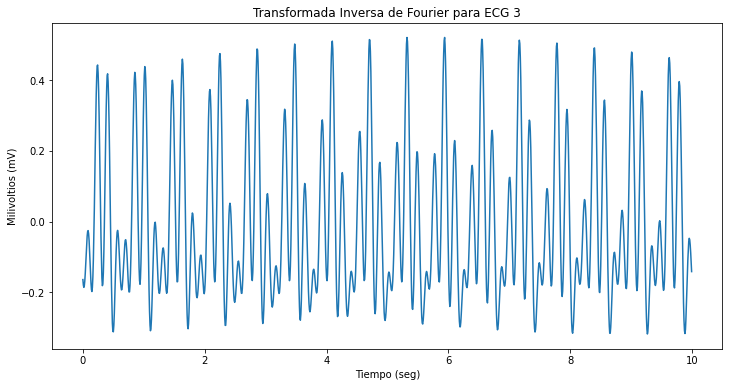

In [ ]:
# Transformada inversa.

tfi=ifft(tf)

plt.figure(figsize=(12,6))
plt.plot(t, tfi)
plt.title('Transformada Inversa de Fourier para ECG 3')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.show()

### **Superposición de los gráficos.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


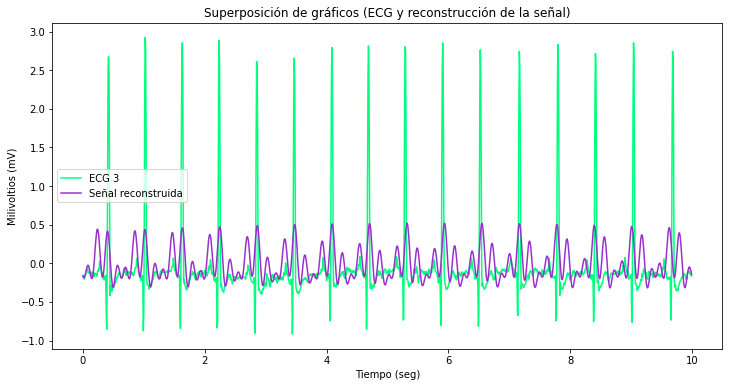

In [ ]:
# Superposición de gráficos.

plt.figure(figsize=(12,6))
plt.plot(t,mv, color='SpringGreen', label='ECG 3')
plt.plot(t,tfi, color='DarkOrchid', label='Señal reconstruida')
plt.title('Superposición de gráficos (ECG y reconstrucción de la señal)')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.legend()
plt.show()

# **Transformada de Fourier - ECG (ejemplo).**

In [ ]:
import numpy as np   # Sirve para realizar cálculos científicos de manera eficiente.
import pandas as pd  # Sirve para limpiar los datos que necesitamos estudiar.
from google.colab import files

uploaded = files.upload()

In [ ]:
datos = pd.read_csv('datos (ejemplo).csv',sep=';',low_memory=False)
datos

In [ ]:
df=pd.DataFrame(datos)
print(df)

In [ ]:
c1=df.iloc [:, 0]
c2=df.iloc [:, 1]

In [ ]:
a=np.array(c1)
b=np.array(c2)

In [ ]:
import matplotlib.pyplot as plt

t=a
mv=b

plt.figure(figsize=(12,6))
plt.plot(t,mv, label='ECG', color='SpringGreen')
plt.title('ECG - Ejemplo', fontsize=12)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.legend()
plt.grid()
plt.show()

Para realizar un espectro de potencia tenemos que tener en cuenta los datos a utilizar. En este caso el rango de frecuencias y la resolución del eje $x$ dependen de la ***frecuencia de muestreo*** y el ***número de puntos adquiridos por la señal***. Esta está dada por la siguiente expresión: 

$$\dfrac{N}{2}$$ 

donde $N$ es el número de puntos que adquiere la señal en el dominio del tiempo. En mi caso:

$$N=7200$$ 

$F_s$ hace referencia a la frecuencia a la que se muestreó la señal adquirida en el dominio del tiempo. En mi caso de están tomando 1000 datos por segundo; es decir,

$$F_s=1000$$

Las líneas de frecuencia que se encuentran en un espectro de potencia (ver figura 1), están dadas por la siguiente expresión:

$$\dfrac{F_s}{2}-\dfrac{F_s}{N}$$

Estas líneas de frecuencia se producen en intervalos de tiempo $\Delta f=\dfrac{F_s}{N}$ que también pueden ser calculadas mediante la siguiente expresión:

$$\Delta f=\dfrac{1}{N \cdot \Delta t}$$

donde $\Delta t$ es el período de muestreo y $N \cdot \Delta t$ es la longitud del registro de tiempo que contiene el dominio de tiempo adquirido.

***Figura 1.***


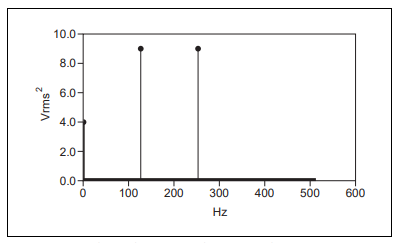

In [ ]:
import scipy, matplotlib 
from scipy.fft import fft, fftfreq, ifft

[]

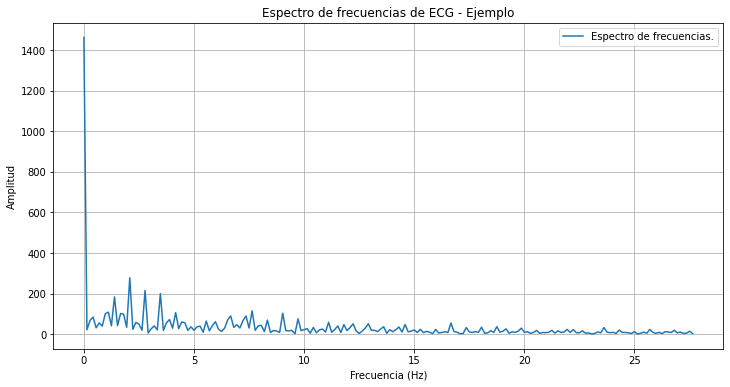

In [ ]:
# Número de puntos de la señal adquirida en el dominio del tiempo.
N=7200

# Frecuencia a la que se muestreó la señal adquirida en el dominio del tiempo.
fs=1000

# Delta de f
deltaf=fs/N

# Líneas de frecuencia.
lf=np.arange(0,N*deltaf,deltaf)

# Transformada de Fourier.
tf=fft(mv)

plt.figure(figsize=(12,6))
plt.plot(lf[:200],np.abs(tf)[:200], label='Espectro de frecuencias.')
#plt.scatter(x=2.08,y=277.8669869364677, color='red')
#plt.scatter(x=1.94,y=33.794944176888706)
plt.title('Espectro de frecuencias de ECG - Ejemplo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.plot()

In [ ]:
busqueda=np.where(np.abs(tf)>200)
busqueda

(array([   0,   15,   20, 7180, 7185]),)

In [ ]:
print(lf[0])
print(lf[12])
print(lf[62])

0.0
1.6666666666666667
8.61111111111111


In [ ]:
print(np.abs(tf[0]))
print(np.abs(lf[12]))
print(np.abs(tf[62]))

1462.002
1.6666666666666667
17.825719136353136


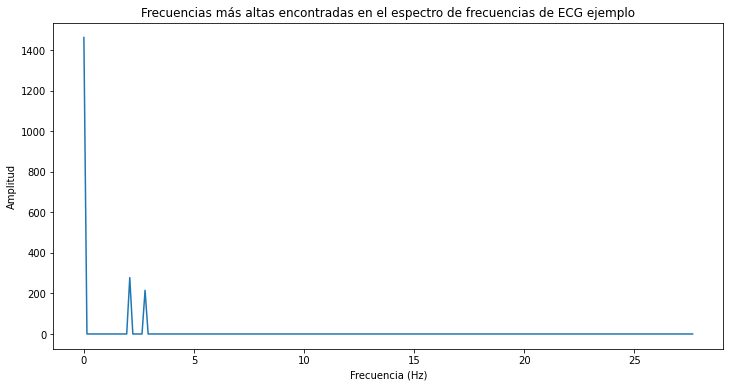

In [ ]:
for n in range(len(tf)):
  if np.abs(tf[n]) < 200:
    tf[n] = 0

plt.figure(figsize=(12,6))
plt.plot(lf[:200],np.abs(tf)[:200])
plt.title('Frecuencias más altas encontradas en el espectro de frecuencias de ECG ejemplo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


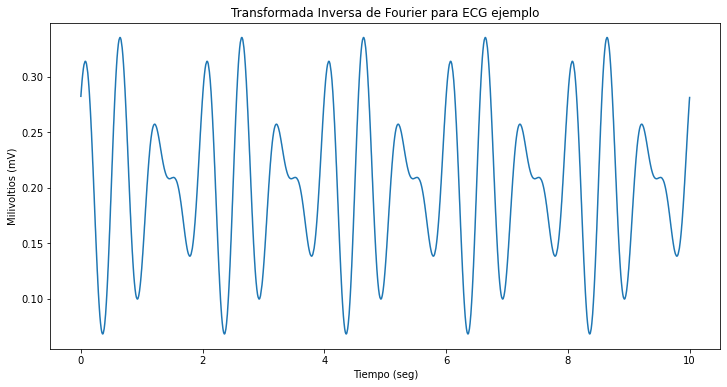

In [ ]:
# Transformada inversa.

tfi=ifft(tf)

plt.figure(figsize=(12,6))
plt.plot(t, tfi)
plt.title('Transformada Inversa de Fourier para ECG ejemplo')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


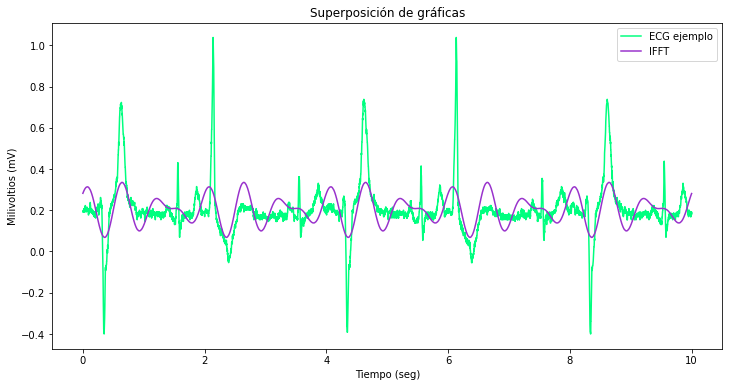

In [ ]:
# Superposición de gráficos.

plt.figure(figsize=(12,6))
plt.plot(t,mv, color='SpringGreen', label='ECG ejemplo')
plt.plot(t,tfi, color='DarkOrchid', label='IFFT')
plt.title('Superposición de gráficas')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.legend()
plt.show()

# **Tranformada rápida e inversa de Fourier (Ejemplo matemático).**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, fftfreq, ifft

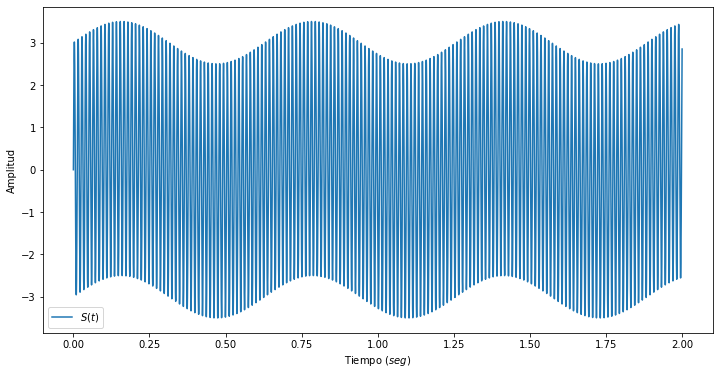

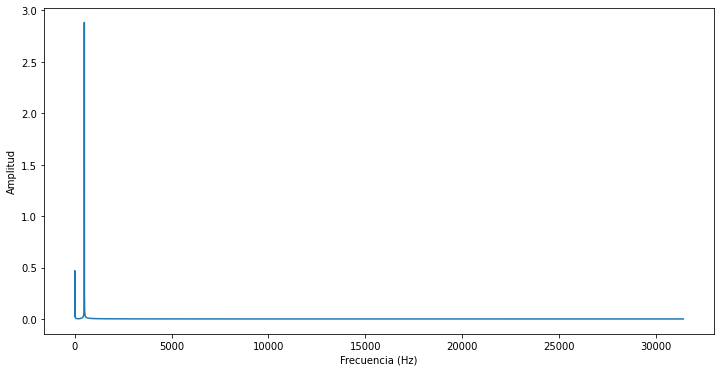

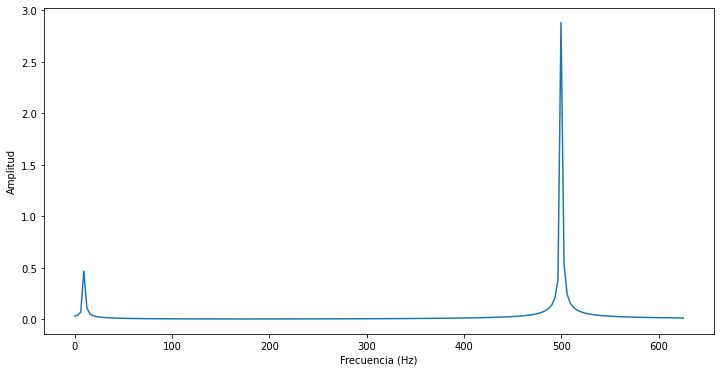

In [ ]:
fs=0.0001
L=2
t=np.arange(0,L,fs)
S=3*np.sin(500*t)+0.5*np.sin(10*t)

plt.figure(figsize=(12,6))
plt.plot(t,S, label='$S(t)$')
plt.xlabel('Tiempo ($seg$)')
plt.ylabel('Amplitud')
plt.legend()
plt.plot()

plt.figure(figsize=(12,6))
a=int(L/(2*fs))
f=(2*np.pi/L)*np.arange(0,a)
Y=fft(S)*2*fs/L
P=np.abs(Y)
plt.plot(f[:a],P[:a])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

plt.figure(figsize=(12,6))
fzoom=f[0:200]
Pzoom=P[0:200]
plt.plot(fzoom,Pzoom)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

# **Transformada de Fourier - Ejemplo práctico.**

**Eliminación del ruido no deseado en un audio.**

In [ ]:
# Instalar paquetes necesarios.

import scipy, matplotlib  # Scipy: tareas de computación científica ----> tranformadas de Fourier.
print(scipy.__file__)   # Instrucción que nos indica si ya fue instalado el paquete. También muestra la ubicación de los paquetes.
print(matplotlib.__file__)

/usr/local/lib/python3.7/dist-packages/scipy/__init__.py
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py


"*Las ondas sinusoidales a veces se denominan tonos puros porque representan una sola frecuencia. Utilizará ondas sinusoidales para generar el audio, ya que formarán picos distintos en el espectro de frecuencia resultante.*" (MacLeod, 2021).

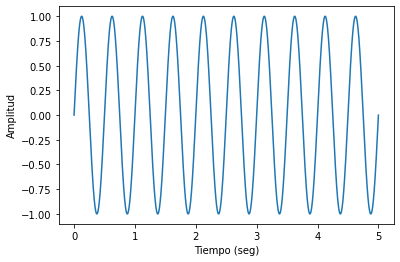

In [ ]:
# Creando una señal.

# Invocando paquetes necesarios.
import numpy as np
from matplotlib import pyplot as plt

# Definiendo constantes.
SAMPLE_RATE = 44100  # Hertz  ¿Cuántos puntos de datos utiliza la señal para representar ondas sinusoidales por segundo?
DURATION = 5  # Seconds  Longitud de la muestra generada.


# Definiendo una función para generar una onda sinusoidal.
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)  # Generando las coordenadas en el ejex. 'Endponint=False'---> señal periódica
    frequencies = x * freq    # Toma la frecuencia ...
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)  
    return x, y   # Devuelve los valores x y y que se utilizarán para trazar la onda

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.show()

Podemos ver que la onda oscila dos veces por segundo. Claramente esta onda sinusoidal es de baja frecuencia y para ser audible por el oído humano es difícil, por lo que se generarán ondas sinusoidales con mayor frecuencia para luego mezclarlas.

In [ ]:
# Mezclando señales de audio.

_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)   # Generando un tono medio
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION) # Generando un tono alto
noise_tone = noise_tone * 0.3 # Se utiliza el tono alto para producir el ruido no deseado y se multiplica por 0.3 para reducir su potencia

mixed_tone = nice_tone + noise_tone  # Finalmente se suman los dos tonos

Ahora, se normaliza la señal para que se encuentre en el formato adecuado del destino. Su formato de destino es un entero de 16 bits, que tiene un rango de -32768 a 32767

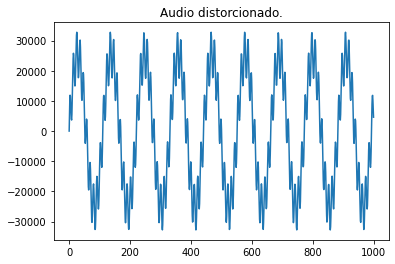

In [ ]:
# Normalizando la señal.

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)  #Mixed tone ----> Para que se ajuste a un entero de 16 bits.

plt.plot(normalized_tone[:1000])
plt.title('Audio distorcionado.')
plt.show()

In [ ]:
# ¿Cómo escuchar el audio?

from scipy.io.wavfile import write   #  Formato que permite leer y almacenar un audio

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)  # Almacenando el audio en un formato WAV.

Ahora, aplicamos la transformada rápida de Fourier.

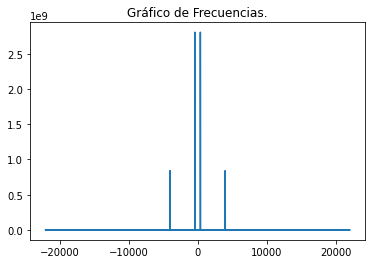

In [ ]:
# Transformada rápida de Fourier.

from scipy.fft import fft, fftfreq  # Importamos el paquete de scipy.fft para calcular la transformada rápida de Fourier.

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION   # Almacena el número de señales que tomará la muestra.

yf = fft(normalized_tone)   # Se calcula la transformada en sí.
xf = fftfreq(N, 1 / SAMPLE_RATE)  # Calcula las frecuencias en el centro de cada valor en la salida de fft().

plt.plot(xf, np.abs(yf))   # Se llama la instrucción 'np.abs(yf)' para tomar los números complejos que tiene yf 
plt.title('Gráfico de Frecuencias.')
plt.show()

Dado que  ``` yf ``` calcula valores completos se requiere de ```np.abs(yf)``` para calcular un solo valor a partir de ellos.

$\sqrt{a^2+b^2}$  ----> Magnitud general para calcular un solo valor.



En la parte derecha del gráfico podemos ver dos picos de frecuencias positivas (400 y 4000 Hz) y sus espejos; frecuencias negativas. La transformada de Fourier tomo una señal complicada y la ha convertido solo en las frecuencias que contiene. 

Eliminando las frecuencias negativas.

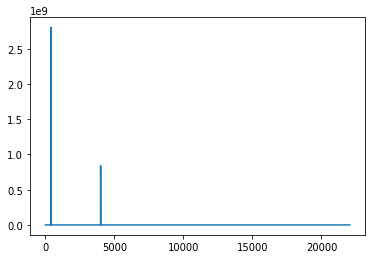

In [ ]:
from scipy.fft import rfft, rfftfreq  # Con la instrucción rfft y rfftfreq eliminamos las frecuencias negativas.

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
# Filtrando la señal.

# La frecuencia máxima es la mitad de la frecuencia de muestreo
points_per_freq = len(xf) / (SAMPLE_RATE / 2)  # Usando la longitud de xf podemos calcular el índice de frecuencias objetivo.

# Nuestra frecuencia objetivo es de 4000 Hz
target_idx = int(points_per_freq * 4000)


points_per_freq, target_idx

(5.000045351473923, 20000)

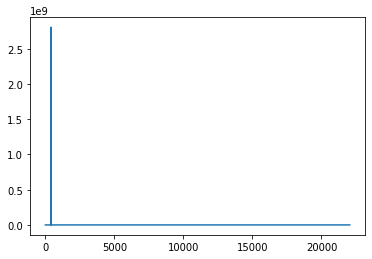

In [ ]:
# Podemos establecer yf a 0 en índices alrededor de la frecuencia de destino para deshacerse de él

yf[target_idx - 1 : target_idx + 2] = 0 

plt.plot(xf, np.abs(yf))
plt.show()

Como hay un solo pico se aplicará la transformada de Fourier inversa para volver al dominio del tiempo.

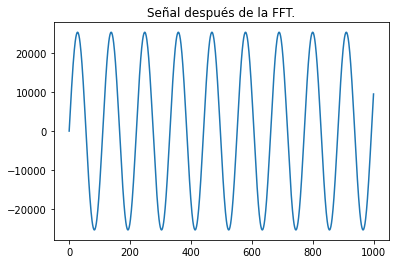

In [ ]:
# Aplicando la inversa.

from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.title('Señal después de la FFT.')
plt.show()

Ahora tenemos una sola onda sinusoidal que oscila a 400 Hz y ha eliminado con éxito el ruido de 4000 Hz. Escuchemos el sonido de la señal.

In [ ]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)